# Empiric tests
### noise variance

/tmp/ipykernel_219753/2823831049.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt : dict[str, torch.Tensor] = torch.load(f'test_results/noise_variance_{experiment_id

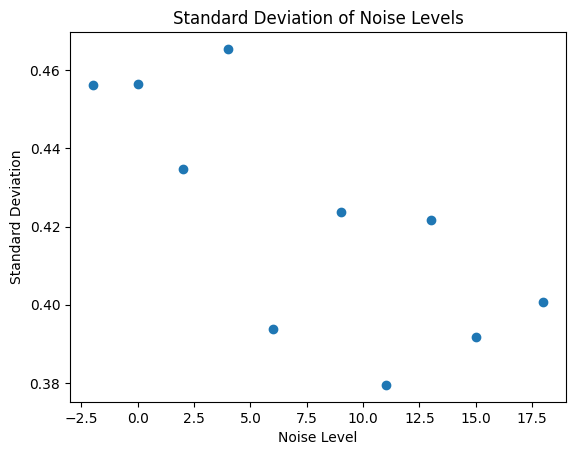

In [2]:
import torch
import matplotlib.pyplot as plt
from IPython.display import display, Audio

experiment_id = '180425125453'
ckpt : dict[str, torch.Tensor] = torch.load(f'test_results/noise_variance_{experiment_id}.pt')

sanity_check = ckpt.pop('sanity_check_sample')
display(Audio(sanity_check.cpu().numpy(), rate=16000))
noise_levels = list(ckpt.keys())
standard_deviations = list(ckpt.values())

plt.scatter(noise_levels, standard_deviations)
plt.xlabel('Noise Level')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Noise Levels')
plt.show()

### Curvature

/tmp/ipykernel_219753/165138196.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  C_ts : dict[int, torch.Tensor] = torch.load(f'test_results/trajectory_curvature_{experime

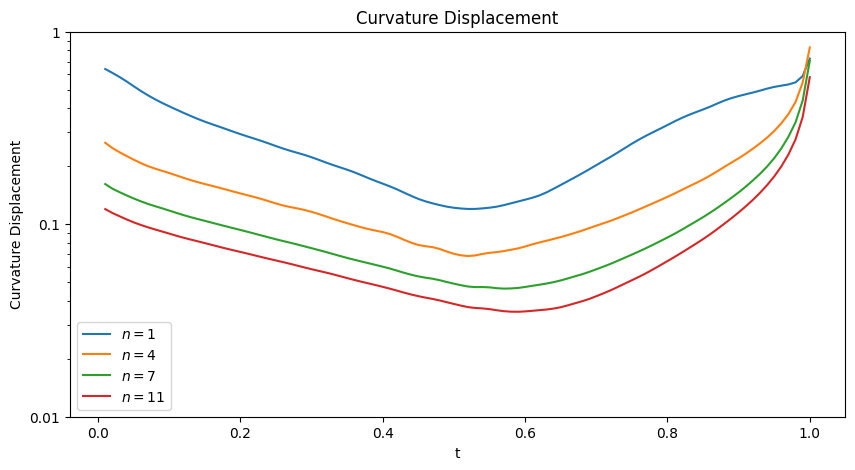

In [3]:
import torch
import matplotlib.pyplot as plt

experiment_id = '180425125453'

C_ts : dict[int, torch.Tensor] = torch.load(f'test_results/trajectory_curvature_{experiment_id}.pt')
timeschedule = C_ts.pop('timeschedule')
dsb_iterations = list(C_ts.keys())
if len(dsb_iterations) > 4:
    dsb_iterations = torch.linspace(dsb_iterations[0], dsb_iterations[-1], 4).long().tolist()
percentile_factor = 0.6745 # 25th percentile of a normal distribution

plt.figure(figsize=(10, 5))
for dsb_iteration in dsb_iterations:
    C_t = C_ts[dsb_iteration]
    C_t_mean = C_t.mean(dim=0)
    C_t_std = C_t.std(dim=0)
    plt.plot(timeschedule[1:], C_t_mean, label=rf'$n={dsb_iteration}$')
    # plt.fill_between(timeschedule[1:], C_t_mean - percentile_factor * C_t_std, C_t_mean + percentile_factor * C_t_std, alpha=0.2)

yticks = [10 ** i for i in range(-2, 1)]
plt.title('Curvature Displacement')
plt.xlabel('t')
plt.legend()
plt.ylabel('Curvature Displacement')
plt.yscale('log')
plt.yticks(yticks, [str(i) for i in yticks])
plt.show()

In [6]:
from src.dataset import ClippedLibri, EarsWHAMUnpaired, AllVCTK, ClippedVCTK, GenderAudioDataset
from IPython.display import display, Audio

dataset = GenderAudioDataset('female', length_seconds=2.5)
num_samples = 5

print(f"Dataset length: {len(dataset)}")
for i in range(num_samples):
    sample = dataset[i]
    display(Audio(sample, rate=dataset.sample_rate))

    

Dataset length: 73386


In [ ]:
from src.lightning_modules.schedulers import DSBScheduler
import torch
    
scheduler = DSBScheduler(10)
scheduler.set_timesteps(5)

x0 = torch.zeros((1,))
x1 = torch.ones((1,))
xk = x1.clone()

for k in reversed(scheduler.timesteps):
    flow = (xk - x0) / scheduler.gammas_bar[scheduler.k_to_index(k)]
    xk = scheduler.step(xk, k, flow, 'inference')
    print(xk)

tensor([1.])
tensor([1.6368])
tensor([1.6885])
tensor([1.3664])
tensor([0.8782])
tensor([-5.9605e-08])
